In [24]:

import pandas as pd

def file_info(file_path):
    try:
        df = pd.read_csv(file_path)
        head = df.head()
        num_data_points = len(df)
        print("Head of the file:")
        print(head)
        print("\nNumber of data points:", num_data_points)

    except pd.errors.ParserError:
        try:
          with open(file_path, 'r') as f:
              head = f.readlines()[:5]
              num_data_points = sum(1 for _ in open(file_path))
          print("Head of the file (first 5 lines):")
          for line in head:
              print(line, end="")
          print("\nNumber of lines:", num_data_points)

        except Exception as e:
          print(f"Error reading file: {e}")

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


file_info('/content/usdinr data since 2000.csv')


Head of the file:
         Date   Price    Open    High     Low Change %
0  2000-02-23  43.600  43.640  43.662  43.600    0.00%
1  2000-02-24  43.600  43.660  43.665  43.550    0.00%
2  2000-02-25  43.650  43.665  43.680  43.600    0.11%
3  2000-02-28  43.605  43.692  43.697  43.605   -0.10%
4  2000-02-29  43.614  43.603  43.620  43.553    0.02%

Number of data points: 5975


In [3]:
import pandas as pd

df = pd.read_csv('/content/usdinr data since 2000.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.rename(columns={'Price': 'ExchangeRate'}, inplace=True)
duplicate_dates = df.index[df.index.duplicated()]
print(f"Duplicate dates: {len(duplicate_dates)}")

df = df[~df.index.duplicated(keep='first')]

ts = df['ExchangeRate'].asfreq('B')
ts = ts.fillna(method='ffill')


Duplicate dates: 44


<ipython-input-3-06bf3e5b2f6d>:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = ts.fillna(method='ffill')  # Forward fill missing values


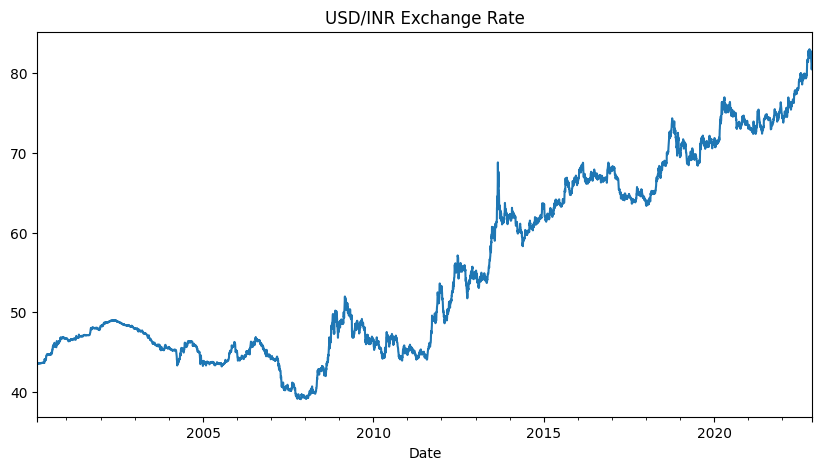

ADF Statistic: 0.46519676709619806
p-value: 0.9837759982300632


In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

ts.plot(figsize=(10, 5), title='USD/INR Exchange Rate')
plt.show()

result = adfuller(ts)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


In [4]:
ts_diff = ts.diff().dropna()

result_diff = adfuller(ts_diff)
print(f'Differenced ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')


Differenced ADF Statistic: -15.301416281788423
p-value: 4.307550443501732e-28


In [5]:
from pmdarima import auto_arima

stepwise_model = auto_arima(ts, seasonal=False, trace=True)
print(stepwise_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-664.370, Time=8.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-611.283, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-609.655, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-609.718, Time=1.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-608.662, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-634.260, Time=4.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-638.290, Time=5.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-662.519, Time=14.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-662.352, Time=6.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-609.846, Time=4.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-636.800, Time=10.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-641.972, Time=7.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-667.310, Time=16.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-669.581, Time=16.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-664.372, Time=16.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-673.899, Time=21.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-669.316, Time=21.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=-673.187, Time=24.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=-668.119, Time=20.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-672.053, Time=10.63 sec

Best model:  ARIMA(5,1,3)(0,0,0)[0] intercept
Total fit time: 212.601 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5933
Model:               SARIMAX(5, 1, 3)   Log Likelihood                 346.950
Date:                Sun, 11 May 2025   AIC                           -673.899
Time:                        12:53:22   BIC                           -607.018
Sample:                             0   HQIC                          -650.660
                               - 5933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0036      0.002      1.665      0.096      -0.0

In [10]:
results = model.fit()

residuals = results.resid


In [13]:
residuals = residuals.reindex(ts.index)

df_ml = pd.DataFrame({
    'residual': residuals,
    'lag1': ts.shift(1),
    'lag2': ts.shift(2),
    'return1': ts.pct_change(1),
    'return5': ts.pct_change(5),
})

df_ml.dropna(inplace=True)

print(df_ml.head())
print(f"Data points: {len(df_ml)}")


            residual    lag1    lag2   return1   return5
Date                                                    
2000-03-01  0.008696  43.614  43.605  0.000252  0.000573
2000-03-02 -0.052634  43.625  43.614 -0.001146 -0.000573
2000-03-03  0.025775  43.575  43.625  0.000574 -0.001145
2000-03-06 -0.000647  43.600  43.575  0.000000 -0.000115
2000-03-07 -0.036832  43.600  43.600 -0.000803 -0.001123
Data points: 5898


In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target
X = df_ml.drop('residual', axis=1)
y = df_ml['residual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_residual = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_residual)
print(f"ML residual model MSE: {mse:.6f}")


ML residual model MSE: 0.002099


In [15]:
arima_fitted = results.fittedvalues.reindex(df_ml.index)

final_pred = arima_fitted.iloc[-len(y_test):] + y_pred_residual

actual = ts.reindex(final_pred.index)
hybrid_mse = mean_squared_error(actual, final_pred)
print(f"Hybrid ARIMA + ML MSE: {hybrid_mse:.6f}")


Hybrid ARIMA + ML MSE: 0.002099


In [16]:
forecast_arima = results.forecast(steps=30)
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_arima.index = forecast_index


In [17]:
last_ts = ts.copy()
all_preds = []

for i in range(30):
    lag1 = last_ts.iloc[-1]
    lag2 = last_ts.iloc[-2]
    return1 = (lag1 - lag2) / lag2
    return5 = (lag1 - last_ts.iloc[-6]) / last_ts.iloc[-6] if len(last_ts) >= 6 else 0

    features = pd.DataFrame([{
        'lag1': lag1,
        'lag2': lag2,
        'return1': return1,
        'return5': return5
    }])

    pred_residual = model.predict(features)[0]
    arima_val = forecast_arima.iloc[i]
    hybrid_val = arima_val + pred_residual
    all_preds.append(hybrid_val)

    last_ts = pd.concat([last_ts, pd.Series([hybrid_val], index=[forecast_index[i]])])


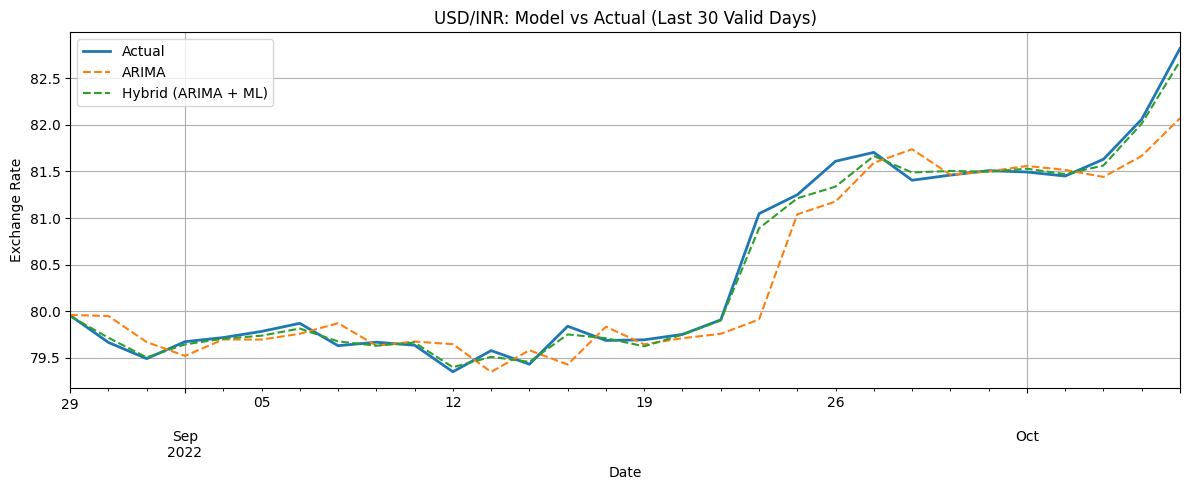

ARIMA MSE:  0.100091
Hybrid MSE: 0.005711


In [22]:
X_test = df_ml.drop('residual', axis=1).iloc[-30:]
y_true = ts.loc[X_test.index]

arima_preds = results.fittedvalues.reindex(X_test.index)

ml_residual_preds = model.predict(X_test)

hybrid_preds = arima_preds + ml_residual_preds

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
y_true.plot(label='Actual', linewidth=2)
arima_preds.plot(label='ARIMA', linestyle='--')
hybrid_preds.plot(label='Hybrid (ARIMA + ML)', linestyle='--')
plt.title('USD/INR: Model vs Actual (Last 30 Valid Days)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error
print(f"ARIMA MSE:  {mean_squared_error(y_true, arima_preds):.6f}")
print(f"Hybrid MSE: {mean_squared_error(y_true, hybrid_preds):.6f}")


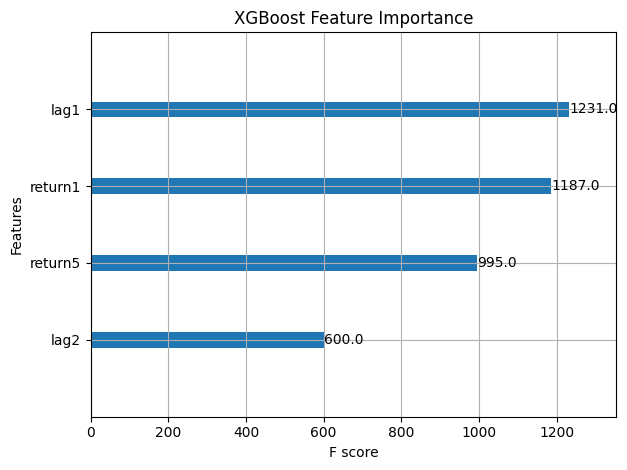

In [23]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()
